<a href="https://colab.research.google.com/github/sweetyjunnarkar/Corona-tweet-sentiments/blob/main/Sweety_Junnarkar_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
working_file="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Coronavirus Tweets.csv"

In [4]:
df = pd.read_csv(working_file,encoding = 'latin')

In [5]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [7]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


So we can see the null values from the location feature

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


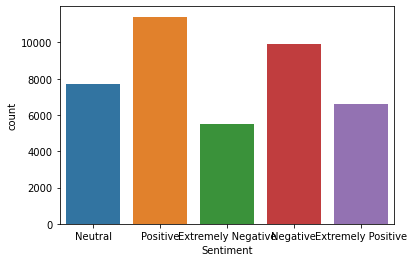

In [9]:
sns.countplot(df["Sentiment"])

In [10]:
df[df['Sentiment']=="Positive"].loc[3,"OriginalTweet"]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

We can see that the above tweet is positive because it is the positive thing happened due to corona. Or in this tweet we are seeing lot of positivity.

In [11]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [12]:
df[df['Sentiment']=="Extremely Positive"].loc[41142,"OriginalTweet"]

'@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.'

In [13]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [14]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

We can definitely relate why it is neutral...!!!

In [15]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [16]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [17]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [18]:
df['Ordinal_Sentiment'] = df['Sentiment'].replace({"Positive":3,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':1})

In [19]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,2
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,1
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,3
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


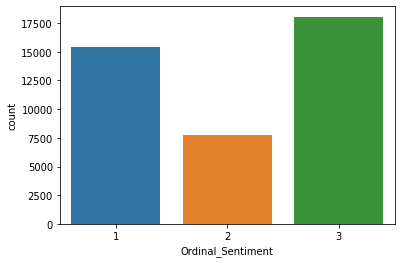

In [20]:
sns.countplot(df['Ordinal_Sentiment'])

From above tweets we can relate to what is positive,extremely positive,extremely negative and negative.

Lets analyze other features:

In [21]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

We can see that most of the tweets are from the month march and april where corona just started spreding.

In [22]:
df[df['TweetAt']=='28-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
24948,28747,73699,Sydney,28-03-2020,.@Woolworths is set to expand its community sh...,Positive,3
24949,28748,73700,NaN,28-03-2020,@JackPosobiec Test kits with low accuracy but ...,Negative,1
24950,28749,73701,NaN,28-03-2020,"NSW, Australia. COVID-19 positive Chinese wom...",Extremely Positive,3
24951,28750,73702,"New Delhi, India",28-03-2020,1 A friend is helping with relief across India...,Extremely Positive,3
24952,28751,73703,"New Hampshire, USA",28-03-2020,My story about how grocery stores and their wo...,Negative,1
24953,28752,73704,A Hesse in MUC and CGN & DUS,28-03-2020,Protected shopping with my wife during the #Co...,Extremely Positive,3
24954,28753,73705,"Chesterfield, VA",28-03-2020,#Coronavirus: Italy becoming impatient with lo...,Extremely Negative,1
24955,28754,73706,RÃ©publique DÃ©mocratique Du Congo,28-03-2020,@mundaditob @marosephine @senatrdc @VoilaNight...,Extremely Positive,3
24956,28755,73707,Toronto,28-03-2020,So you want to limit trips to the grocery stor...,Positive,3
24957,28756,73708,"Victoria, Australia",28-03-2020,"When all this is over, IÂll never again take ...",Extremely Positive,3


In [23]:
df[df['TweetAt']=='30-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
25096,28895,73847,"England, United Kingdom",30-03-2020,"""Frontline staff work upto 14hrs""\r\r\n\r\r\n""...",Positive,3
25097,28896,73848,NaN,30-03-2020,"No matter what you talk about, the conversatio...",Extremely Negative,1
25098,28897,73849,"Adelaide, South Australia",30-03-2020,The @UN has been forced to issue a Âbattle pl...,Extremely Negative,1
25099,28898,73850,India,30-03-2020,#Covid2019 | Demand for existing residential s...,Negative,1
25100,28899,73851,NaN,30-03-2020,The supermarket is full of people It seems tha...,Positive,3
...,...,...,...,...,...,...,...
25178,28977,73929,NaN,30-03-2020,@MOPHQatar @MOI_QatarEn @ILQLive Limit the amo...,Extremely Positive,3
25179,28978,73930,Earth,30-03-2020,"@realDonaldTrump Why do you keep saying ""if yo...",Negative,1
25180,28979,73931,Jakarta,30-03-2020,You know shit is real when the supermarket is ...,Negative,1
25181,28980,73932,NaN,30-03-2020,At the best of times I canÂt stand anyone nea...,Extremely Positive,3


In [24]:
df['Location'].value_counts()

London                           540
United States                    528
London, England                  520
New York, NY                     395
Washington, DC                   373
                                ... 
Right behind you AAAAAAHHHH!!      1
Mansfield (Notts)                  1
N 51Â°32' 0'' / E 0Â°2' 0''        1
SinKKKhole?Jared'sBackchannel      1
Earth/Matrix                       1
Name: Location, Length: 12220, dtype: int64

In [25]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,2
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,1
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,3
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


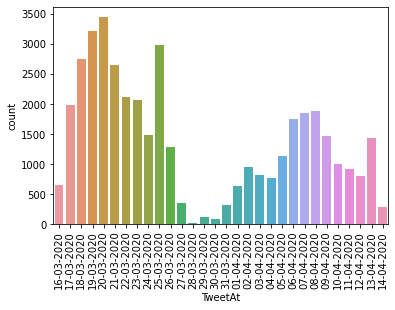

In [26]:
sns.countplot(df['TweetAt'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


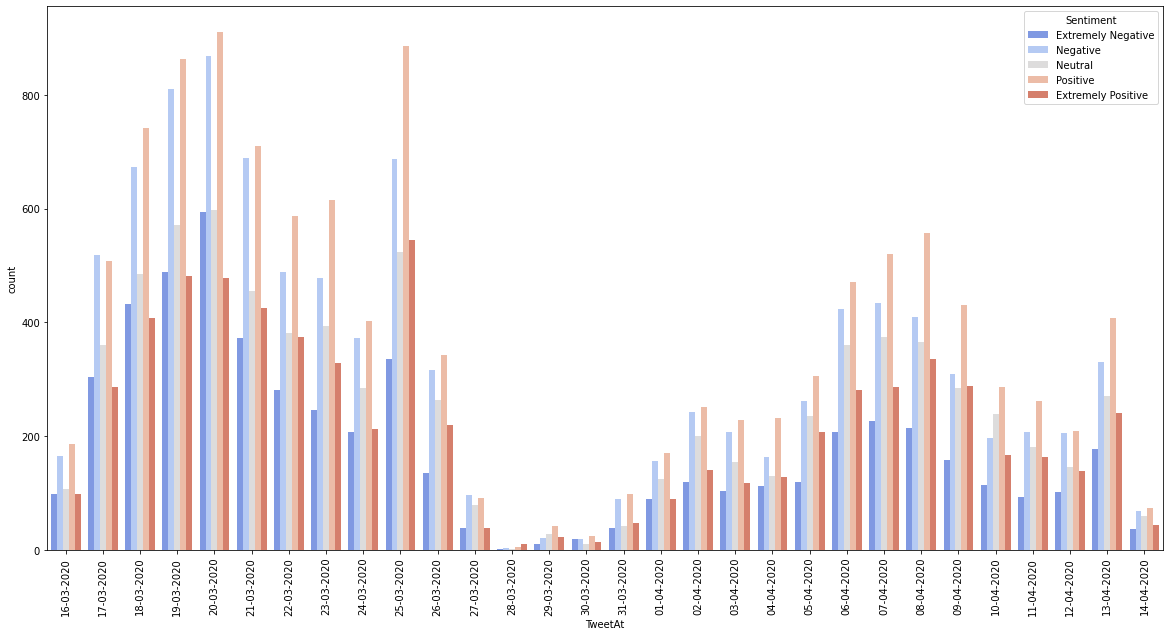

In [27]:
sns.countplot(df['TweetAt'],hue = df['Sentiment'],hue_order=[ 'Extremely Negative', 'Negative','Neutral', 'Positive','Extremely Positive'],palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


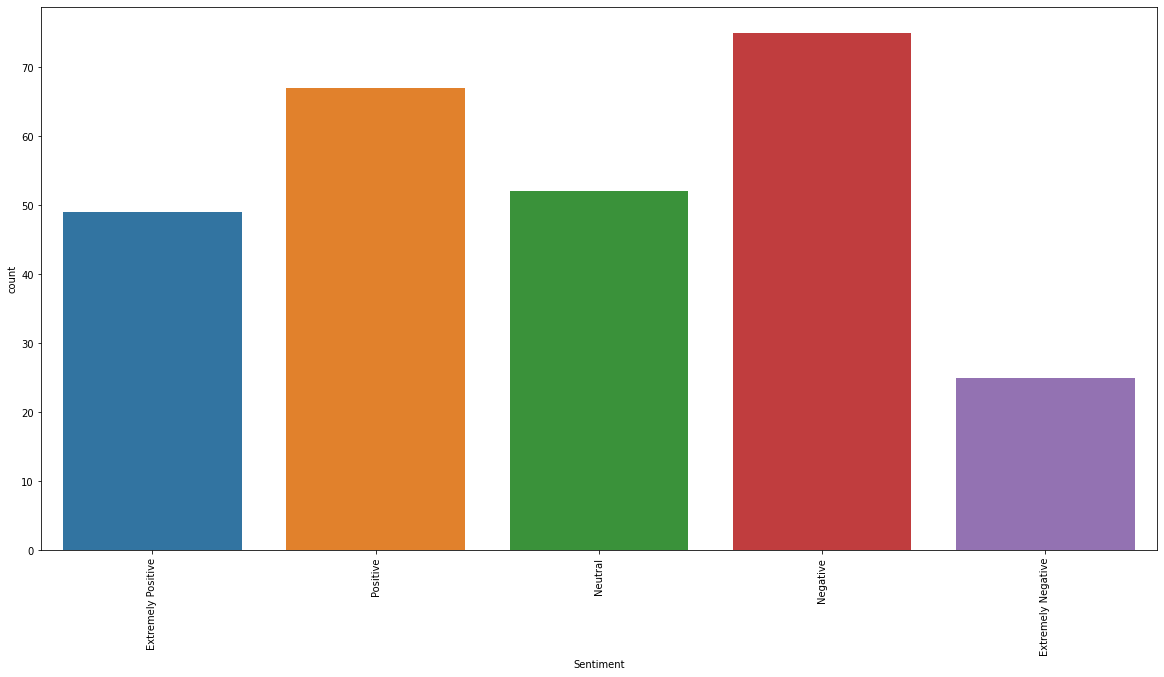

In [28]:
sns.countplot(df[df['Location']=="India"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


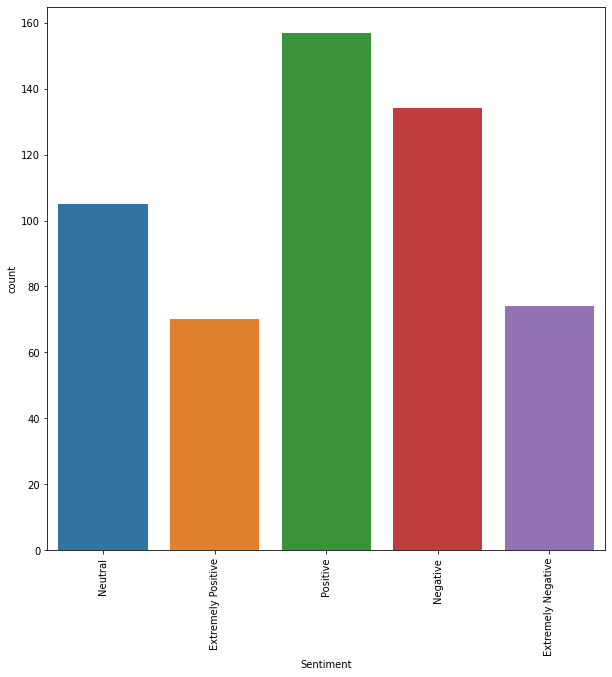

In [29]:
sns.countplot(df[df['Location']=="London"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


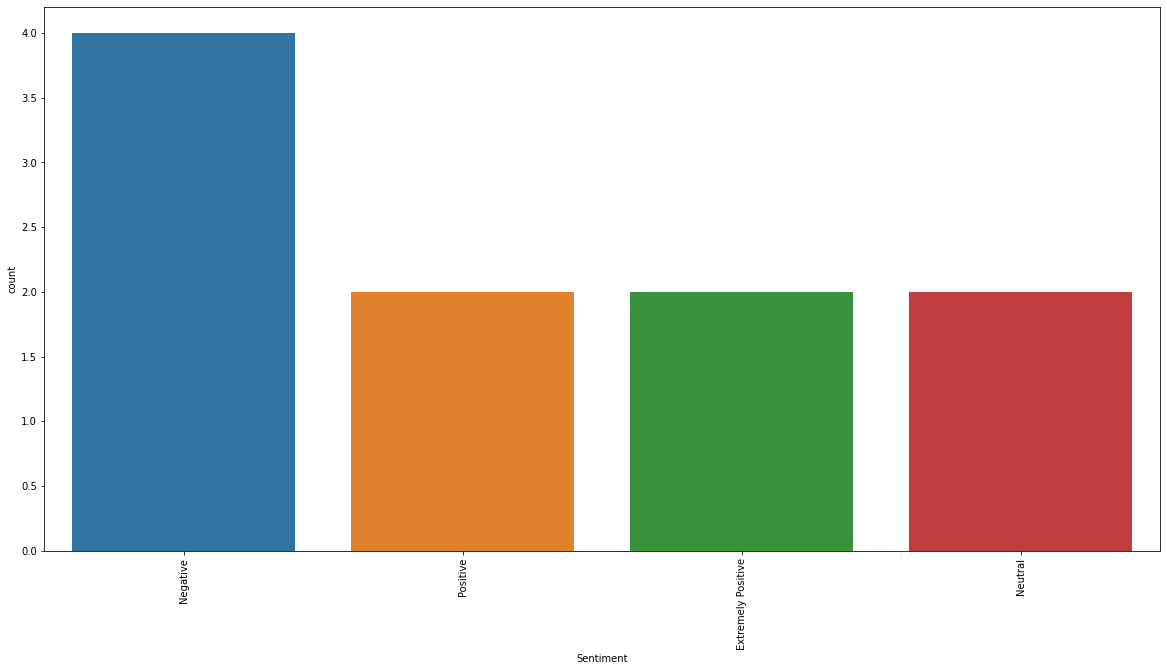

In [30]:
sns.countplot(df[df['Location']=="China"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


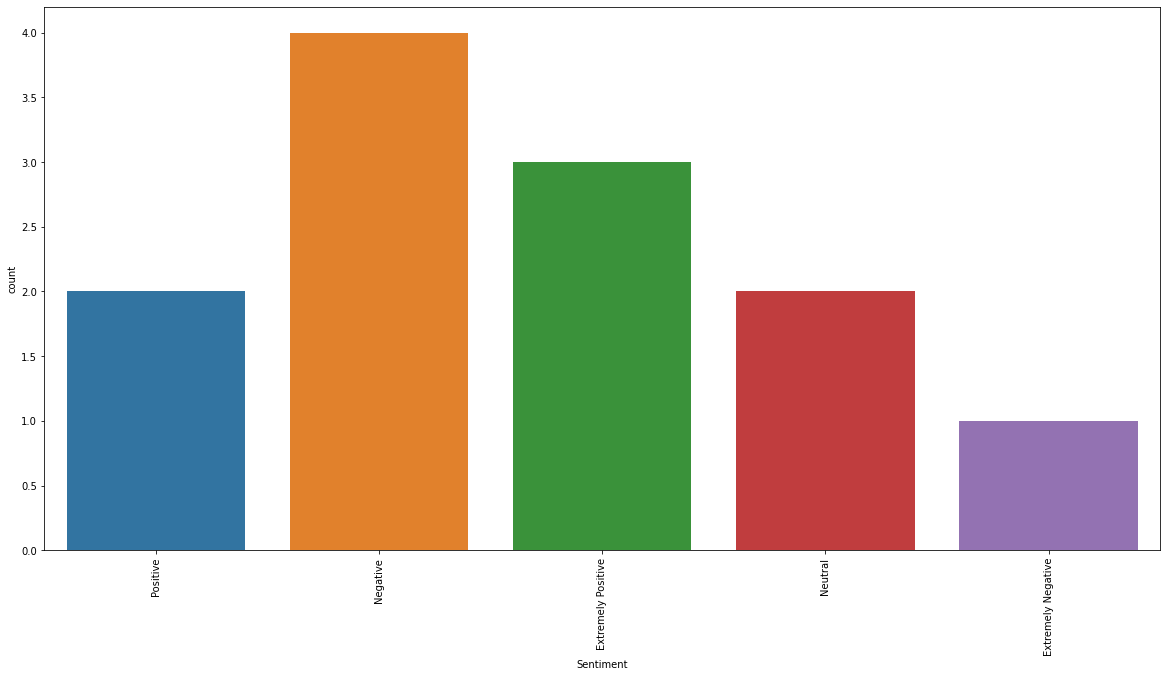

In [31]:
sns.countplot(df[df['Location']=="US"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


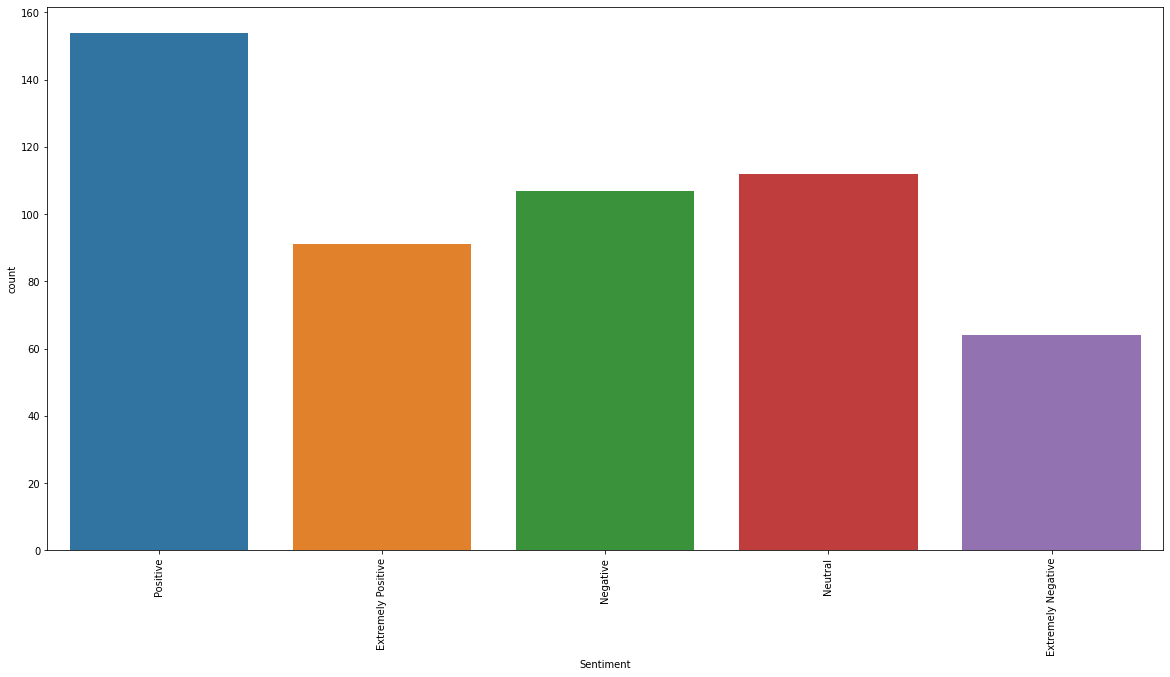

In [32]:
sns.countplot(df[df['Location']=="United States"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


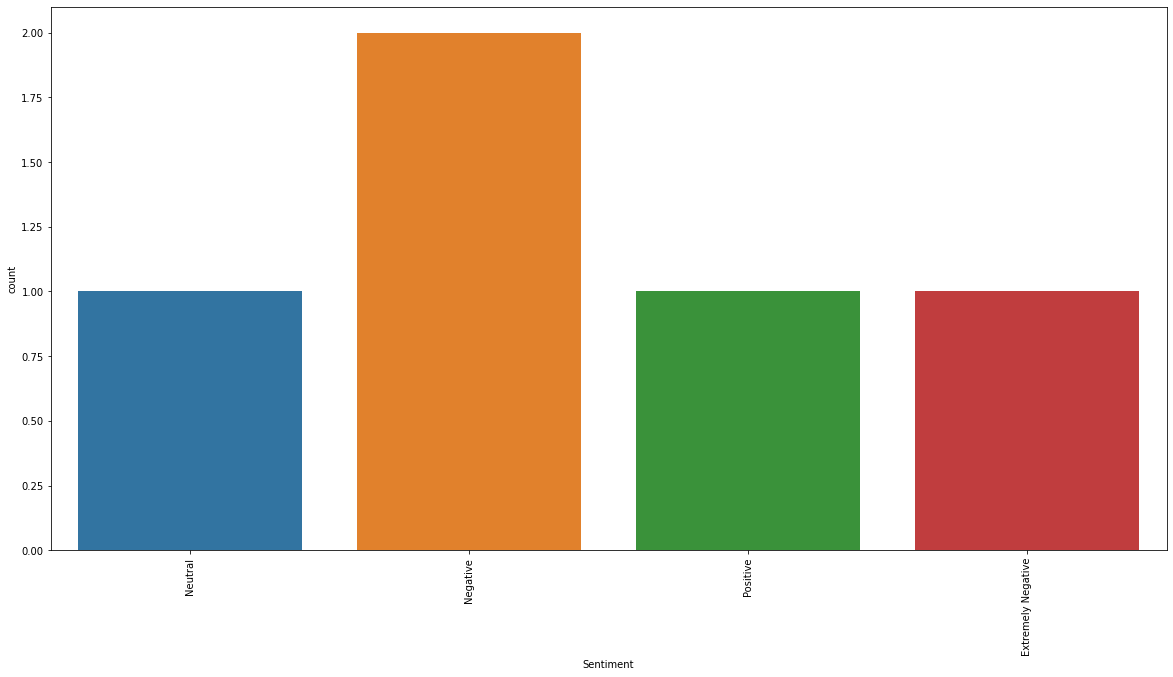

In [33]:
sns.countplot(df[df['Location']=="Austria"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

In [34]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Ordinal_Sentiment'],
      dtype='object')

In [38]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:

df.shape

(41157, 7)

In [40]:
df.loc[np.random.randint(0,40000)]

UserName                                                         14166
ScreenName                                                       59118
Location                                                           NaN
TweetAt                                                     20-03-2020
OriginalTweet        To all the desi shops hiking prices of atta an...
Sentiment                                                     Negative
Ordinal_Sentiment                                                    1
Name: 10367, dtype: object

In [41]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


In [42]:
pun = string.punctuation

In [43]:
pun = pun.replace('#','')

In [44]:
pun

'!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def rem_pun(tweet):
  stri = ''
  for i in tweet:
    if i not in pun:
      stri+=i
    else:
      stri+=' '
  return stri

In [46]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [47]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [48]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def tweet_words_conversion(tweet):
    new_text = []
    for w in tweet.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [49]:
def rm_links(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [50]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [51]:
def rm_sw(tweet):
  a= []
  sw = stopwords.words('english')
  for word in tweet.lower().split():
    if word.startswith('#') or word.startswith('@'):
      continue
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [52]:
def strip_ly(tweet):
  a=[]
  suffix="ly"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [53]:
def strip_ing(tweet):
  a=[]
  suffix="ing"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [54]:
def strip_ed(tweet):
  a=[]
  suffix="ed"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)-1]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [55]:
import re

def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [56]:
df['filtered_tweets'] = df['OriginalTweet'].apply(rm_links).apply(lambda x :  x.replace('\r','').replace('\n',''))

In [57]:
df['filtered_tweets'] = df['filtered_tweets'].apply(rm_sw).apply(rm_dig)

In [58]:
df['filtered_tweets'] = df['filtered_tweets'].apply(rem_pun).apply(strip_ing).apply(strip_ly).apply(strip_ed).apply(tweet_words_conversion).apply(stem_words)

In [59]:
df['filtered_tweets'] = df['filtered_tweets'].apply(rm_sw)

In [62]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [63]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [64]:
df['filtered_tweets']=df['filtered_tweets'].apply(lemmatize_words)

In [65]:
df["OriginalTweet"].iloc[25]

"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"

In [66]:
df['filtered_tweets'].iloc[25]

'uk poll indic major expect impact last month march expect increas next see full result coronaviru consum confid tracker'

In [67]:
df['filtered_tweets'].iloc[25]

'uk poll indic major expect impact last month march expect increas next see full result coronaviru consum confid tracker'

In [68]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [69]:
df['hashtags'].iloc[6]

'covid_19'

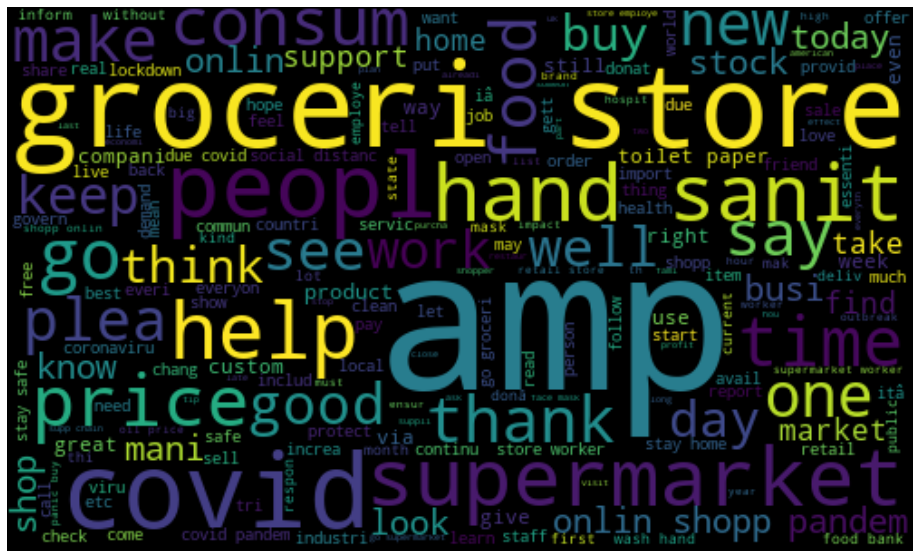

In [70]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

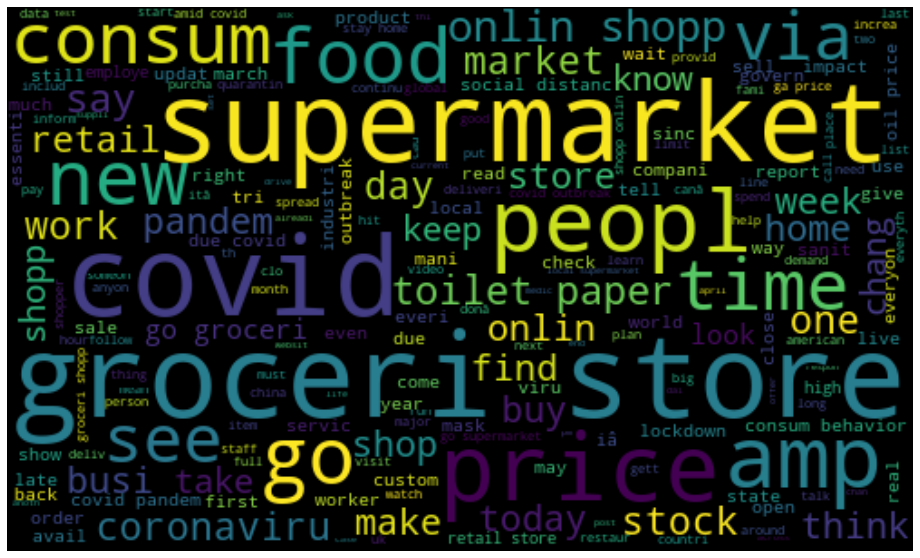

In [71]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

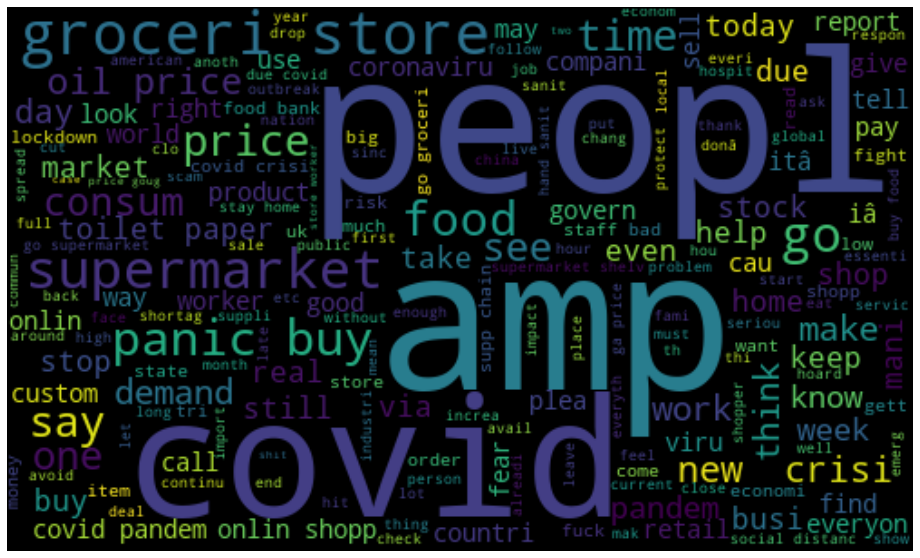

In [72]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:
df.loc[37029]

UserName                                                         40828
ScreenName                                                       85780
Location                                                  New York, NY
TweetAt                                                     10-04-2020
OriginalTweet        This piece from @reuters talks about inflation...
Sentiment                                           Extremely Negative
Ordinal_Sentiment                                                    1
filtered_tweets      piec talk inflat overal compon risk supp disru...
hashtags                                                  coronavirus.
Name: 37029, dtype: object

In [74]:
r = np.random.randint(0,40000)
a,b,c= df.loc[r,['filtered_tweets','hashtags','OriginalTweet']]

In [75]:
print(f'ft:{a}\nHashtags:{b}\nOT:{c}')

ft:chang ohio report case clariti v nonessenti medic procedur chang pharmaci benefit transit author guidelin donat ohio food bank april alert
Hashtags:covid19,essential,sanitizer,coronavirus
OT:Changes to Ohio's reporting of #covid19 cases, clarity on #essential vs nonessential medical procedures, changes to pharmacy benefit, transit authority guidelines, and @JobsOhio #sanitizer donation to Ohio food banks. April 10, 2020 #coronavirus alert. https://t.co/wVygvLmjAi


In [76]:
df['hashtags'].value_counts()

                                                 17541
coronavirus                                       2991
covid_19                                           668
covid2019                                          391
coronavirus,covid19                                308
                                                 ...  
writingcommnunity,,coronavirus,quarentinelife        1
pmg,parkmead,oott,coronavirus,pmg                    1
wwf,wwe,coronavirus,covid?19                         1
covid2019,amwriting                                  1
restaurant,coronavirus                               1
Name: hashtags, Length: 15660, dtype: int64

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
# vectorizer_hashtag = TfidfVectorizer(min_df = 5,ngram_range=(1,2),analyzer="word")
vectorizer_words  = TfidfVectorizer( min_df= 10,ngram_range=(1,3),analyzer="word")

In [79]:
final_df=pd.concat([pd.DataFrame(data=vectorizer_words.fit_transform(df['filtered_tweets']).toarray(), columns=vectorizer_words.get_feature_names()),
                    df['Ordinal_Sentiment']],axis=1)

In [80]:
final_df

,ab,abc,abid,abil,abl,abl buy,abl find,abl get,abl go,abl keep,abl stock,abl work,abroad,absenc,absolut,absurd,abt,abu,abuja,abund,abus,ac,accc,acceler,acceler trend,accelera,accelerat,accep,accept,access,access food,access onlin,accessori,accident,accommod,accord,account,accu,accur,achiev,...,year march,year old,year old daughter,year year,yeast,yel,yell,yellow,yep,yesterday,yesterday groceri,yesterday groceri store,yet,yet anoth,yield,yo,york,york citi,yorker,young,young peopl,yourselv,youth,youtub,youâ,youâ go,youâ ll,yoy,yr,yr old,yâ,yâ all,zealand,zero,zimbabw,zombi,zombi apocalyps,zone,zoom,Ordinal_Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172969,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
41153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
41154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
41155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


lets do modelling

In [81]:
X = final_df.drop('Ordinal_Sentiment',axis=1)
y=final_df['Ordinal_Sentiment']

In [82]:
Xn = X[:5000]
yn= y[:5000]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(Xn,yn,test_size  = 0.2)

In [85]:
# del X,y,Xn,yn,new_df,ht_df,w_df

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
model = MultinomialNB(fit_prior=False)

In [91]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [92]:
y_pred_train =  model.predict(X_train)

In [93]:
from sklearn.metrics import *
accuracy_score(y_train,y_pred_train)

0.841

In [94]:
confusion_matrix(y_train,y_pred_train)

array([[1503,    5,  121],
       [ 170,  327,  221],
       [ 116,    3, 1534]])

In [ ]:
# y_pred_test =  model.predict(X_test)

In [ ]:
# accuracy_score(y_test,y_pred_test)

0.549

In [ ]:
# confusion_matrix(y_test,y_pred_test)

array([[258,  21, 118],
       [ 67,  44,  59],
       [164,  22, 247]])